# Linearly Separable Data and the Perceptron Learning Algorithm


Consider a binary classification problem such as determining if an image of a handwritten character is the number 2 or if it is a different chracter.

<img src="http://www.acsu.buffalo.edu/~danet/Sp18/MTH448/class16/class16_files/digits.png" width=200>


If one can represent each images in a space (e.g., a feature space $F$) such that there exists a line, plane or hyperplane that perfectly separates the two classes (2's and non 2's), then the data is linearly separable. One of the most effect methods for solving this classification problem is the Perceptron Learning Algorithm (PLA).

## Let's consider some linearly separable data

Populating the interactive namespace from numpy and matplotlib


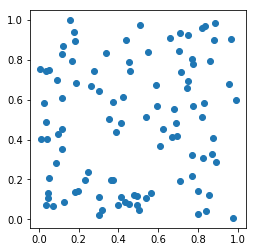

In [1]:
from numpy import *
%pylab inline

d = 2 #2 dimensions
n = 100 #data points
x = random.rand(d,n) #randomly place points in 2D
#print(x)
subplot(111,aspect=1)
plot(x[0],x[1],'o')

### lets draw a line and split the points into 2 groups, above vs below the line

[-1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.
  1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.]


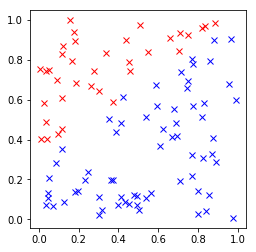

In [2]:
# lets use the line y = 1/3 + 2/3 x, or 0=-1-2x+3y

y = sign(dot(array([-2,+3.]),x) - 1)
print(y)

xp = x.T[y>0].T 
xm = x.T[y<0].T 
subplot(111,aspect=1)
plot(xp[0],xp[1],'rx')
plot(xm[0],xm[1],'bx');

#### Let's modify things so there's only an inner product

[-1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.  1.
  1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.]


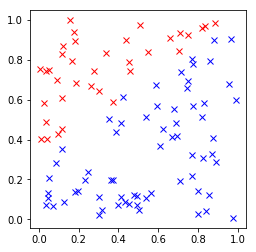

In [3]:
#Define a 3D vector that is [1,x_1,x_2]
X = empty((d+1,n))
X[0,:] = 1
X[1:,:] = x

W_true = array([-1,-2,3.])
y = sign(dot(W_true,X))
print(y)

def draw_points(X,y):
    subplot(111,aspect=1)
    xp = X[1:,y>0]
    xm = X[1:,y<0] 
    plot(xp[0],xp[1],'rx')
    plot(xm[0],xm[1],'bx');
    
draw_points(X,y)

### let's open up a little space between the classes

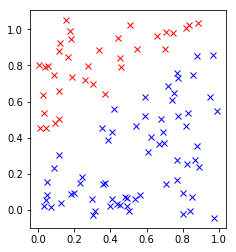

In [4]:
# let's open up a little space between the classes
halfgap = 0.05
X[-1,y>0] += halfgap
X[-1,y<0] -= halfgap
draw_points(X,y)

### Now forget that we already know a separating W and the labels $\{y_i\}$

Our task is identify a separating hyperplane, $W$, using just some of the known labels $y_i$ that can classify the labels of all points.  This is a binary supervised linear classification problem. We will use the PLA.


Note that we seek to learn a map $g$ such that
$$ g:\mathbb{R}^2\to\{-1,1\}$$

# Perceptron learning algorithm (PLA)

See <a href="https://datasciencelab.wordpress.com/page/2/">this blog<a> and <a href="https://en.wikipedia.org/wiki/Perceptron">this wiki<a>  for more information 

In [5]:
# We are given X and y ONLY!!

W = array([-1,-1,5],dtype=float)  # starting guess at separating W

while(True):
    misclassified = sign(dot(W,X)) != y
    if not any( misclassified  ): break
    i = random.choice( arange(n)[misclassified] )  # random misclassified point 
    W += y[i]*X[:,i]  # PLA step
print(W)       

[-1.         -4.30589297  4.75321633]


Let's do it again, but with graphics.

First, let's create a function that draws the guess at W

In [6]:
def drawline(W,color,alpha):
    plot([0,1],[-W[0]/W[2],-(W[0]+W[1])/W[2]],color=color,alpha=alpha)

## Define PLA

This time, we will create a fuction

In [7]:
def PLA(XX,yy,W0,max_counter,visualize):
    if visualize==1:
        draw_points(X,y)# draw points
        xlim(0,1)
        ylim(0,1)

    W=W0
    counter = 0
    while(True and counter<max_counter):
        counter+=1
        misclassified = sign(dot(W,XX)) != yy
        #print(len(XX))
        #print(len(yy))
        #print((misclassified))        
        if not any(misclassified): 
            break
        i = random.choice( arange(len(yy))[misclassified] )  # random misclassified point 
        W += yy[i]*XX[:,i];  # PLA step
        
        if visualize==1: 
            drawline(W,'k',min(.05*counter,1))
            #print(sum(misclassified))

    if visualize==1: 
        drawline(W,'k',1) 
        drawline(W_true,'c',1) #actual

    error=sum(misclassified)# total error
        
    return W,error

## Run the PLA

W = [-2.         -3.74344471  5.9488167 ] 
 Error = 0.0%


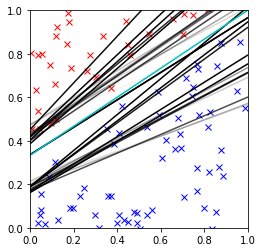

In [8]:
W0 = array([-1,-1,5],dtype=float)# starting guess at separating plane
max_counter = 100 # maximum number of iterations to allow
visualize = 1 #should we visualize?


W,error = PLA(X,y,W0,max_counter,visualize)
print('W = '+str(W),'\n', 'Error = '+str(error/n*100)  +'%')    

What is the effect of the counter?



# Cross Validation

So far, we have trained the classifier on all datapoints and tested the classifier on all data points. For this reason, and because the data is designed to be linearly seperable, the algorithm eventially converges and eventually there is 0 classification error. In other words, we obtain perfect classification for our data.

However, we are only able to know it's reached perfect classification error because we know all the classification labels. This is unrealistic. In the real world, we will know the labels for some datapoints and not for others. How then can we tell if our classification algorithm is going well ... cross validation.

1. For the moment, let's restrict our attention to only data in which we know the labels. 
2. Cross validation involves splitting the datapoints into 2 sets, the training data and testing data. 
3. Then, one creates a classifier  using only the \textit{training} data. For example, one would implement the PLA to obtain $W$ using only some fraction $s$ of the data.
4. After the classifier has converged (or at least allowed enough iterations), then the classifier is tested on the remaining \textit{testing} datapoints. 
5. The performance on the test data provides an estimate for how the algorithm's performance when predicting the labels for data when their labels are actually unknown.


# Exercise 1: Implement cross-validation for the PLA

Below is some code and an outline to get you started

### Step 1: Create and visualize data

Define a function to create data points and draw points

In [9]:
def create_data(n,d):
    x = random.rand(d,n) #randomly place points in 2D
    X = empty((d+1,n))
    X[0,:] = 1
    X[1:,:] = x    
    y = sign(dot(W_true,X))  
    halfgap = 0.05
    X[-1,y>0] += halfgap
    X[-1,y<0] -= halfgap
    return X,y

Chose parameters and create data

In [10]:
d = 2 #2 dimensions
n = 200 #data points
X,y = create_data(n,d);

Split data into training and test, and visualize it.
Circles are training data and x's are testing data

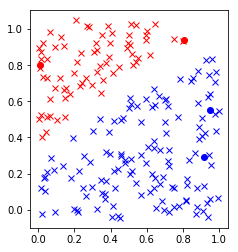

In [11]:
# function that draws points. The first s-fraction of the data are training, and the rest are testing data
def draw_points2(X,y,s,n):
    subplot(111,aspect=1)
    xp = X[1:,y>0]
    xm = X[1:,y<0] 
    plot(xp[0][0:int(s*n)],xp[1][0:int(s*n)],'ro')# train data
    plot(xm[0][0:int(s*n)],xm[1][0:int(s*n)],'bo')# train data
    plot(xp[0][int(s*n):n],xp[1][int(s*n):n],'rx')# test data
    plot(xm[0][int(s*n):n],xm[1][int(s*n):n],'bx')# test data    

    
s = 0.01 # fraction training data
draw_points2(X,y,s,n)

### Step 2: Train the PLA on ONLY the training data

In [12]:
def split_data(X,y,s):
    X_train = X[:,0:int(s*n)]
    y_train = y[  0:int(s*n)]
    X_test  = X[:,int(s*n):n]
    y_test  = y[  int(s*n):n]
    return X_train,y_train,X_test,y_test 

X_train,y_train,X_test,y_test = split_data(X,y,s)

Now define PLA paramters and run the PLA

In [13]:
W0 = array([-1,-1,6],dtype=float)# starting guess at separating plane
max_counter = 1000 # max number of iterations
visualize = 0 #should we visualize the PLA

W,train_error = PLA(X_train,y_train,W0,max_counter,visualize)

print('W = '+str(W),'\n', 'Train Error = '+str(train_error/n*100)  +'%')    

W = [-1. -1.  6.] 
 Train Error = 0.0%


### Step 3: Use your learned hyperplane W to classify the test data and report the error percentage

In [14]:
def compute_misclassified_test_error(W,X_test,y_test):
    misclassified_test_data = sign(dot(W,X_test)) != y_test
    test_error = sum(misclassified_test_data)*100/ (n-(s*n))
    return test_error

print('Test Error = ' + str(compute_misclassified_test_error(W,X_test,y_test)) + '%')

Test Error = 33.83838383838384%


### Step 4: Modularize/package all your code into function that takes (n,s) as input, and as output it gives the test error percentage


In [15]:
def compute_errors_given_n_s(n,s):
    # create data
    X,y = create_data(n,d);
    
    # split data
    X_train,y_train,X_test,y_test = split_data(X,y,s)    
    
    # running the PLA
    W0 = array([-1,-1,6],dtype=float)# starting guess at separating plane
    max_counter = 1000
    visualize = 0
    W,train_error = PLA(X_train,y_train,W0,max_counter,visualize)

    # computing error
    test_error = compute_misclassified_test_error(W,X_test,y_test)
    return train_error,test_error


Now make sure the function works

In [16]:
n=200
s=0.01
train_error,test_error = compute_errors_given_n_s(n,s)
print('Train Error = ' + str(train_error) + '%')
print('Test Error = ' + str(test_error) + '%')

Train Error = 0%
Test Error = 36.36363636363637%



Visualize the results to observe why the train and test errors differ


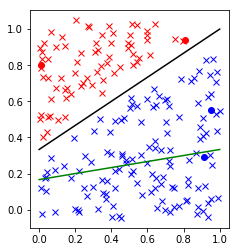

In [17]:
draw_points2(X,y,s,n)
drawline(W_true,'k',1)
drawline(W,'g',1)

# HW 4 - Due Sunday April 8
* Complete the following questions. Your assignment is to submit to UBLearns a zipped folder that contains 3 figures (preferably pdf, but eps/jpg/... will work) as specified at the bottom of the notebook. (You may need to hit refresh in your browser to see HW4 in the notebook.) 
* For full credit, you must include axes labels and a title. You must also include a <a href="https://matplotlib.org/users/legend_guide.html">legend</a> for figures 2 and 3. The legend indiates that the 3 lines correspond to the 3 values of $n$


1. For fixed $n=200$, make a plot of the error rate as a function of the training fraction $s$.



/Users/drt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Test Error vs Training Fraction')

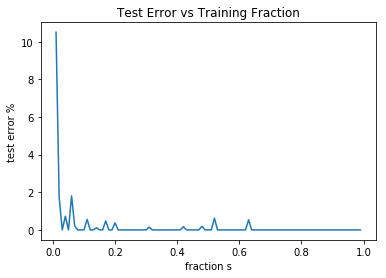

In [22]:
n=1000
s_values = np.linspace(.01, 1, 100, endpoint=True)

test_errors = np.zeros(len(s_values))
for s_index in range(len(s_values)):
    s = s_values[s_index]
    train_error,test_error = compute_errors_given_n_s(n,s)
    test_errors[s_index] = test_error
plot(s_values,test_errors)
xlabel('fraction s')
ylabel('test error %')
title('Test Error vs Training Fraction')

Make a plot that shows the error rate as a function of the training fraction $s$, but it shows 3 curves for 3 values of $n$: $n\in\{200,500,1000\}$.


/Users/drt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


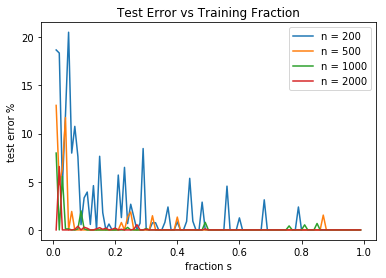

In [23]:
s_values = np.linspace(.01, 1, 100, endpoint=True)
n_values =[200,500,1000,2000]

for n in n_values:
    test_errors = np.zeros(len(s_values))
    for s_index in range(len(s_values)):
        s = s_values[s_index]
        train_error,test_error = compute_errors_given_n_s(n,s)
        test_errors[s_index] = test_error
    plot(s_values,test_errors)

xlabel('fraction s')
ylabel('test error %')
title('Test Error vs Training Fraction')
legend(['n = '+str(n_values[nn]) for nn in range(len(n_values))])


Repeat 2, but this time implement 25 trials for each value of $s$ and $n$. That is, repeat each experiment 25 times and create an <a href="https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html">errorbar plot</a> showing the average and standard deviation for the test error rate as a functon of $s$.

/Users/drt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


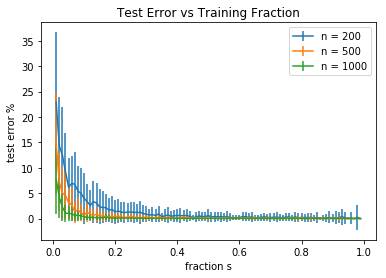

In [49]:
n_values =[200,500,1000]
number_trials = 100
s_values = np.linspace(.01, 1, 100, endpoint=True)

for n in n_values:   
    test_errors = np.zeros((number_trials,len(s_values)))
    mean_test_error = np.zeros(len(s_values))
    std_test_error = np.zeros(len(s_values))
    
    for s_index in range(len(s_values)):
        for t in range(number_trials):                        
            s = s_values[s_index]
            train_error,test_error = compute_errors_given_n_s(n,s)
            test_errors[t,s_index] = test_error

        mean_test_error[s_index] = mean(test_errors[:,s_index])
        std_test_error[s_index] = std(test_errors[:,s_index])

    errorbar(s_values,mean_test_error,std_test_error)

xlabel('fraction s')
ylabel('test error %')
title('Test Error vs Training Fraction')
legend(['n = '+str(n_values[nn]) for nn in range(len(n_values))])